<a href="https://colab.research.google.com/github/nicolegg/Torch_Colab/blob/master/TorchMatriz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

operaciones matemáticas básicas con PyTorch. PyTorch es un marco computacional para construir modelos de aprendizaje automático profundo. Aquí, sin embargo, usaremos PyTorch para las matemáticas de la escuela secundaria primero, luego para una tarea de regresión simple y finalmente para limpiar una imagen con objetos periodicos "atómicos".

Importar PyTorch:

In [1]:
import torch 
print ("importado")

importado


Definir algunos tensonres

In [2]:
# Crear un tensor de 3 x 3 que contenga número aleatorios
a = torch.rand(3, 3)
# Crear un tensor de 3 x 3 que contenga todos
b = torch.ones(3, 3)
# Crear un tendos de 3 x 3 de identidad
c = torch.eye(3, 3)
print ("Creado")

Creado


Imprimir los tensores que acabamos de definir

In [3]:
print(a, type(a))
print(b, type(b))
print(c, type(c))

tensor([[3.0882e-02, 3.0273e-04, 8.4248e-01],
        [2.6393e-01, 2.6371e-01, 1.8379e-01],
        [5.8791e-01, 9.9736e-01, 1.3997e-01]]) <class 'torch.Tensor'>
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) <class 'torch.Tensor'>
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) <class 'torch.Tensor'>


Restar o sumar:

In [0]:
d = torch.sub(b, a)
e = torch.add(b,c)

Resultados de la suma y resta entre matrices

In [5]:
print(d, type(d))
print(e, type(e))

tensor([[0.9691, 0.9997, 0.1575],
        [0.7361, 0.7363, 0.8162],
        [0.4121, 0.0026, 0.8600]]) <class 'torch.Tensor'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>


Es fácil convertir entre la clase de tensor de antorcha y la matriz numpy de Python "estándar":

In [6]:
e = e.numpy() # tensor de antorcha --> numpy
print(e, type(e))
e = torch.from_numpy(e) # numpy --> tensor de antorcha
print(e, type(e))

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]] <class 'numpy.ndarray'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>



También podemos concatenar tensores a lo largo del eje especificado, aquí concatenamos dos tensores 2D a lo largo de sus filas (dimensión 0) es decir un contador de la matriz

In [7]:
bc = torch.cat((b, c), dim=0)
print(bc, bc.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) torch.Size([6, 3])


Concatenación a lo largo de columnas (dimensión 1). Observe también que al ejecutar la celda a continuación anularemos la variable bc definida en la celda de arriba. es decir un contador de la matriz

In [8]:
bc = torch.cat((b, c), dim=1)
print(bc, bc.size())

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]]) torch.Size([3, 6])



Una de las principales ventajas de usar los tensores de pytorch es que puede transferirlos al dispositivo GPU para cálculos más rápidos que involucran operaciones de tensor (que no puede hacer para una matriz numpy normal). Podemos ver varios dispositivos GPU disponibles ejecutando una celda a continuación (puede activar / desactivar el soporte de GPU en Tiempo de ejecución -> Cambiar tipo de tiempo de ejecución).

In [9]:
torch.cuda.device_count()

1

También podemos obtener un nombre de GPU que esté disponible (Colab proporciona los aceleradores de GPU Tesla K80 vs Tesla T4):

In [10]:
torch.cuda.get_device_name(0)

'Tesla K80'

Aquí transferimos nuestro tensor concatenado a un dispositivo GPU:

In [11]:
bc = bc.cuda()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]], device='cuda:0')



Confirme que el tensor está "sentado" en el dispositivo GPU:

In [12]:
bc.is_cuda

True


Ahora transfiéralo de nuevo a la CPU:

In [13]:
bc = bc.cpu()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]])



Confirme que ya no está en el dispositivo GPU:

In [14]:
bc.is_cuda

False


Usaremos esta operación simple para transferir un modelo de red neuronal y datos de entrenamiento entre CPU y GPU en la siguiente sección.

Pequeña advertencia: nuestras matrices numpy tienen un número de coma flotante de 64 bits de forma predeterminada, que se convierte en DoubleTensor cuando se llama a `torch.from_numpy ()`. Sin embargo, al entrenar nuestro modelo, nuestros pesos serán FloatTensor (coma flotante de 32 bits) de forma predeterminada. Este desajuste causará un error. La solución más fácil es lanzar un DoubleTensor a FloatTensor simplemente llamando a .`float ()`, es decir, `bc = torch.from_numpy (bc) .float ().`


**Regresión simple con PyTorch**


Las redes neuronales son aproximadores de función universal. Para ilustrarlo aquí, generaremos puntos de datos usando una función *sin*, dañaremos los datos producidos por ruido aleatorio y luego "ajustaremos" la distribución objetivo con una red neuronal. Los datos se generarán con PyTorch en lugar del módulo numpy (pero observe muchas similitudes):

In [15]:
!pip install matplotlib==1.3.1

  Using cached https://files.pythonhosted.org/packages/d4/d0/17f17792a4d50994397052220dbe3ac9850ecbde0297b7572933fa4a5c98/matplotlib-1.3.1.tar.gz
  ERROR: Failed building wheel for matplotlib
  Running setup.py clean for matplotlib
Failed to build matplotlib
ERROR: yellowbrick 0.9.1 has requirement matplotlib!=3.0.0,>=1.5.1, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: seaborn 0.10.0 has requirement matplotlib>=2.1.2, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement matplotlib!=3.0.0,>=2.0.0, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: pandas-profiling 1.4.1 has requirement matplotlib>=1.4, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: mlxtend 0.14.0 has requirement matplotlib>=1.5.1, but you'll have matplotlib 1.3.1 which is incompatible.
ERROR: mizani 0.6.0 has requireme

In [16]:
torch.manual_seed(42)
x = torch.unsqueeze(torch.arange(-10, 10, 0.01), dim=1)
y = torch.sin(x) + 0.2*torch.randn(x.size())
print("ready")

ready



Trace los datos generados:

In [17]:
from matplotlib import pyplot as plt
print("importado")

importado


Text(0, 0.5, 'y')

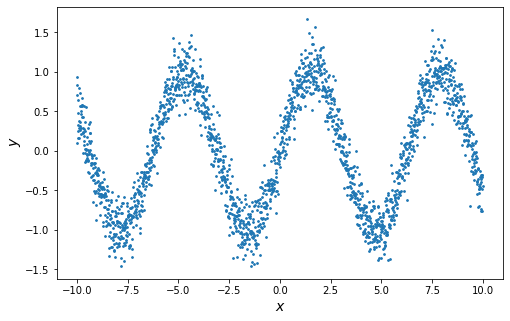

In [18]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y, s=3)
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')


Ahora construimos una red neuronal simple para adaptarse a la distribución de datos. Nuestra red neuronal tiene solo dos capas completamente conectadas, cada una con 100 neuronas, activadas por la función de unidad lineal rectificada con fugas. Luego especificamos parámetros para el entrenamiento del modelo (optimizador de pesas y función / criterio de pérdida) y lo trasladamos al dispositivo GPU para cálculos más rápidos.

Construir un modelo:

In [19]:
#Contruyendo el modelo
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(in_features=100, out_features=100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(in_features=100, out_features=1),
)
print("construido C:")

construido C:



Mueva nuestro modelo junto con los datos de entrenamiento al dispositivo GPU

In [20]:
model.cuda()
x = x.cuda()
y = y.cuda()
print("listo")

listo


Especifique el optimizador y la función de pérdida para el entrenamiento de redes neuronales:

In [28]:
optimizador = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) # stochastic gradient descent
criterio = torch.nn.MSELoss() # mean-squared loss
print("hds")

hds


Finalmente, entrenamos nuestro modelo simple:

(esto no debería tomar más de un minuto)

In [29]:
EPOCHS = 20000
for e in range(EPOCHS):
  #Gradientes claras
  optimizador.zero_grad()
  # propagar la variable x a través de una red y obtener la predicción del modelo
  y_predicted = model(x)
  # compare el valor pronosticado con el valor verdadero y calcule el error cuadrático medio
  loss = criterio(y_predicted, y)
  # hacer retropropagación para calcular gradientes
  loss.backward()
  # optimizar pesos
  optimizador.step()
  # imprimir estadísticas
  if e % 100 == 0:
    print('Epoch: {}  Loss: {}'.format(e, loss.item()))

Epoch: 0  Loss: 0.038709186017513275
Epoch: 100  Loss: 0.0387083925306797
Epoch: 200  Loss: 0.03870745375752449
Epoch: 300  Loss: 0.03870666027069092
Epoch: 400  Loss: 0.038705822080373764
Epoch: 500  Loss: 0.03870502486824989
Epoch: 600  Loss: 0.038704220205545425
Epoch: 700  Loss: 0.03870338946580887
Epoch: 800  Loss: 0.038702525198459625
Epoch: 900  Loss: 0.03870173543691635
Epoch: 1000  Loss: 0.03870099037885666
Epoch: 1100  Loss: 0.038700275123119354
Epoch: 1200  Loss: 0.03869951143860817
Epoch: 1300  Loss: 0.038698844611644745
Epoch: 1400  Loss: 0.038698241114616394
Epoch: 1500  Loss: 0.038697533309459686
Epoch: 1600  Loss: 0.03869693726301193
Epoch: 1700  Loss: 0.03869631141424179
Epoch: 1800  Loss: 0.03869573399424553
Epoch: 1900  Loss: 0.03869514539837837
Epoch: 2000  Loss: 0.038694605231285095
Epoch: 2100  Loss: 0.038694314658641815
Epoch: 2200  Loss: 0.038693808019161224
Epoch: 2300  Loss: 0.03869335353374481
Epoch: 2400  Loss: 0.038692813366651535
Epoch: 2500  Loss: 0.03869

Transfiera los datos nuevamente a la CPU y conviértalos en numpy para trazar:

In [30]:
x_to_plot = x.cpu().numpy()
y_to_plot = y.cpu().numpy()
y_predicted_to_plot = y_predicted.cpu().data.numpy()
print("transferido")

transferido



Resultados de la trama:

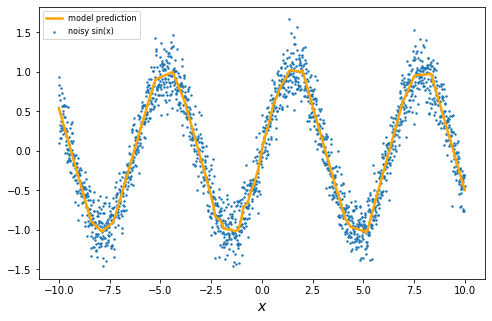

In [31]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x_to_plot, y_to_plot, s=2, label='noisy sin(x)')
ax.plot(x_to_plot, y_predicted_to_plot, c='orange', linewidth=2.5, label='model prediction')
ax.set_xlabel('x', fontsize=14, style='italic')
ax.legend(loc='best', fontsize=8)

Los resultados son realmente bastante buenos. Tenga en cuenta que este tipo de red neuronal generalmente no puede capturar patrones de largo alcance en los datos y tampoco es muy bueno para la generalización, por lo que en el futuro vamos a utilizar una red que consiste en capas convolucionales en lugar de capas clásicas "lineales". como hicimos aquí


Ahora veamos qué tan bueno es nuestro modelo para hacer predicciones para nuevos puntos de datos. Primero, transfiera un modelo a la CPU:

In [32]:
model = model.cpu()
print("cambiado a CPU")

cambiado a CPU


Especifique un valor en radianes para el que desea hacer una predicción:

In [34]:
new_data_point = 1.575
print("¿Es este un nuevo punto de datos?", new_data_point not in x)
new_var = torch.Tensor([[new_data_point]])
print("Predicción del modelo entrenado:", model(new_var).item())

¿Es este un nuevo punto de datos? True
Predicción del modelo entrenado: 1.0128681659698486


Esto está bastante cerca de un valor real sin (x) para x = 1.575


**Limpieza de imagen "atómica" con Pytorch**